In [10]:
#Please read Data Investigation Submission About - Project 4 MLFND.pdf before going through this code
%matplotlib inline

import traceback
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./tmdb-movies.csv')
df


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
df['genres'] = df['genres'].str.split('|')

In [21]:
#Helper syntax code to check for null values
pd.isnull(df['genres'][424])

True

In [22]:
#Question 1 Get counnts for eack genre present in data set
genre_unique={}
for index in range(len(df['genres'])):
    s = pd.Series(df['genres'][index])
    if not s.isnull().values.any() :
        for i in range(len(df['genres'][index])):
            if(df['genres'][index][i] not in genre_unique):
                genre_unique[df['genres'][index][i]]=0
            genre_unique[df['genres'][index][i]]=genre_unique.get(df['genres'][index][i]) + 1
    else:
        #we could log or dump these records somwhere further. For any record a field found null, complete record is ignored.
        pass
genre_unique_sorted = sorted(genre_unique.items(), key=operator.itemgetter(1))
genre_unique_sorted = dict(genre_unique_sorted)
print(genre_unique_sorted)

{'Western': 165, 'TV Movie': 167, 'Foreign': 188, 'War': 270, 'History': 334, 'Music': 408, 'Documentary': 520, 'Animation': 699, 'Mystery': 810, 'Fantasy': 916, 'Science Fiction': 1230, 'Family': 1231, 'Crime': 1355, 'Adventure': 1471, 'Horror': 1637, 'Romance': 1712, 'Action': 2385, 'Thriller': 2908, 'Comedy': 3793, 'Drama': 4761}


In [6]:
df['revenue']

0        1513528810
1         378436354
2         295238201
3        2068178225
4        1506249360
5         532950503
6         440603537
7         595380321
8        1156730962
9         853708609
10        880674609
11        183987723
12         36869414
13        243637091
14       1405035767
15        155760117
16        325771424
17        518602163
18        542351353
19        650523427
20        209035668
21         91709827
22        470490832
23        569651467
24        133346506
25        682330139
26        215863606
27        403802136
28         88346473
29        311256926
            ...    
10836             0
10837             0
10838             0
10839             0
10840             0
10841             0
10842             0
10843             0
10844             0
10845             0
10846             0
10847             0
10848      12000000
10849             0
10850             0
10851             0
10852             0
10853             0
10854             0


<IPython.core.display.Javascript object>


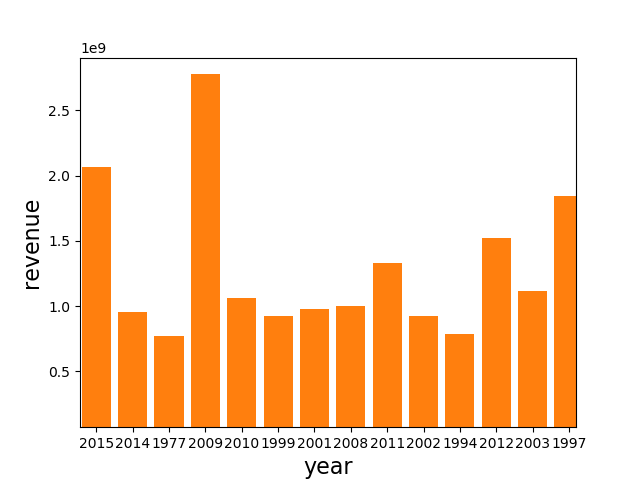

In [28]:
def plot_bar(context_dict,xlabel='xlabel',ylabel='ylabel'):
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    #Make a bar plot.
    plt.bar(range(len(context_dict)), context_dict.values(), align='center')
    #Set the location and labels
    plt.xticks(range(len(context_dict)), list(context_dict.keys()))
    #Display the bat plot
    plt.show()
    
plot_bar(genre_unique,'genre','freq_count')

In [31]:
plt.savefig('revenueyear.png')

In [29]:
#Question 2 Get year wise maximum revenue of any film
maxrevenue_peryear={}
for index in range(len(df['revenue'])):
    if(df['release_year'][index] not in maxrevenue_peryear):
        maxrevenue_peryear[df['release_year'][index]]=0
    if(maxrevenue_peryear[df['release_year'][index]] < df['revenue'][index]) :
        maxrevenue_peryear[df['release_year'][index]]=df['revenue'][index]
#genre_unique = sorted(genre_unique.items(), key=operator.itemgetter(1))
#genre_unique = dict(genre_unique)
maxrevenue_peryear_sorted = sorted(maxrevenue_peryear.items(), key=operator.itemgetter(1))
maxrevenue_peryear_sorted = dict(maxrevenue_peryear_sorted)
print(maxrevenue_peryear_sorted)

{1966: 33736689, 1968: 56715371, 1960: 60000000, 1962: 70000000, 1963: 78898765, 1969: 102308889, 1971: 116000000, 1974: 119500000, 1964: 124900000, 1970: 136400000, 1976: 161000000, 1965: 163214286, 1967: 205843612, 1979: 210300000, 1961: 215880014, 1972: 245066411, 1978: 300218018, 1987: 320145693, 1984: 333000000, 1988: 354825435, 1986: 356830601, 1985: 381109762, 1981: 389925971, 1973: 441306145, 1975: 470654000, 1989: 474171806, 1992: 504050219, 1990: 505000000, 1991: 520000000, 1980: 538400000, 2000: 546388105, 1998: 553799566, 1983: 572700000, 1977: 775398007, 1994: 788241776, 1982: 792910554, 1996: 816969268, 2005: 895921036, 2004: 919838758, 1993: 920100000, 1999: 924317558, 2002: 926287400, 2014: 955119788, 2007: 961000000, 2001: 976475550, 2008: 1001921825, 2010: 1063171911, 2006: 1065659812, 1995: 1106279658, 2003: 1118888979, 2013: 1274219009, 2011: 1327817822, 2012: 1519557910, 1997: 1845034188, 2015: 2068178225, 2009: 2781505847}


In [30]:
plot_bar(maxrevenue_peryear,'year','revenue')
